In [2]:
import pandas as pd
df = pd.read_csv('Parte_1/dados.csv')

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
sorted(df['Anos de Estudo'].unique())
#Váriavel qualitativa ordindal

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [5]:
df['Cor'].unique()
#Váriavel qualitativa nominal

array([8, 2, 4, 6, 0], dtype=int64)

In [6]:
df['Renda'].unique()
#Váriavel Quantitativa Discreta/ e.g. Idade

array([  800,  1150,   880, ..., 36000,  1329,  5260], dtype=int64)

In [7]:
df['Altura'].unique()
#Váriavel Quantitativa Contínua

array([1.60380762, 1.73978983, 1.76044382, ..., 1.83058738, 1.72634426,
       1.65830485])

## Distribuições de Frequências

In [8]:
#Crie um DataFrame com distr freque de Sexo
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [9]:
frequencia = df.value_counts('Sexo')
porcentagem = df.value_counts(subset='Sexo', normalize=True)*100
porcentagem

Sexo
0    69.299844
1    30.700156
dtype: float64

In [10]:
dist_freq_sexo = pd.DataFrame(data={'Frequência':frequencia, 'Porcentagem %':porcentagem})
dist_freq_sexo.rename(axis='index', mapper={0:'Homem', 1:'Mulher'}, inplace=True)
dist_freq_sexo.index.name = ''
dist_freq_sexo.rename(mapper={'Frequência':'1_Frequência', 'Porcentagem %':'2_Porcentagem %'}, axis='columns', inplace=True)
dist_freq_sexo

,1_Frequência,2_Porcentagem %
,,
Homem,53250,69.299844
Mulher,23590,30.700156


In [11]:
sexo = {0:'Masculino', 1:'Feminino'}
cor = {0:'Índigena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'}


In [12]:
frequencia = pd.crosstab(index=df['Sexo'], columns=df['Cor'])
frequencia.rename(mapper=sexo, axis='index', inplace=True)
frequencia.rename(cor,axis='columns',inplace=True)
frequencia

Cor,Índigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [13]:
porcentagem = pd.crosstab(index=df['Sexo'], columns=df['Cor'], normalize=True)*100
porcentagem.rename(index=sexo, inplace=True)
porcentagem.rename(columns=cor, inplace=True)
porcentagem

Cor,Índigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [14]:
percentual = pd.crosstab(index=df['Sexo'], columns=df['Cor'], aggfunc='mean', values=df['Renda'])
percentual.rename(sexo, axis='index', inplace=True)
percentual.rename(cor, axis='columns', inplace=True)
percentual

Cor,Índigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [15]:
classe = [0, 1576, 3152, 7880, 15760, max(df['Renda'])]
nome = ['E', 'D', 'C', 'B', 'A']


In [16]:
s= pd.cut(df['Renda'], bins=classe, labels=nome, include_lowest=True)
frequencia = pd.value_counts(s)
porcentagem = pd.value_counts(s, normalize=True)*100

In [17]:
dist_freq_renda = pd.DataFrame({'Frequência':frequencia, 'Porcentagem %':porcentagem})
dist_freq_renda.sort_index(axis='index', ascending=False, inplace=True)
dist_freq_renda

,Frequência,Porcentagem %
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [18]:
df.head()
#Faremos o mesmo para a Altura

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [19]:
classe = [0, 1.65, 1.75, max(df['Altura'])]
nome = ['0 - Baixa', '1 - Média', '2 - Alta']
frequencia = pd.value_counts(pd.cut(df['Altura'], bins=classe, labels=nome))
frequencia


1 - Média    36162
0 - Baixa    20529
2 - Alta     20149
Name: Altura, dtype: int64

In [20]:
porcentual = pd.value_counts(
    pd.cut(df['Altura'], bins=classe, labels=nome),
    normalize=True
)*100
porcentual

1 - Média    47.061426
0 - Baixa    26.716554
2 - Alta     26.222020
Name: Altura, dtype: float64

In [21]:
freq_altura = pd.DataFrame({'Frequência':frequencia, 'Porcentual':porcentual})
freq_altura.sort_index(axis='index', inplace=True)
freq_altura


,Frequência,Porcentual
0 - Baixa,20529,26.716554
1 - Média,36162,47.061426
2 - Alta,20149,26.222020


O mesmo para váriavel renda, usando a regra de sturges para criação das faixas de valores

In [22]:
import numpy as np
n = df.shape[0]

In [23]:
n

76840

In [24]:
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
k

17

In [25]:
faixas = pd.value_counts(
    pd.cut(df['Renda'], bins=17))
faixas

(-200.0, 11764.706]         75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [26]:
porcentagem = pd.value_counts(
    pd.cut(df['Renda'], bins=17),
    normalize=True
)*100
porcentagem

(-200.0, 11764.706]         98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(94117.647, 105882.353]      0.007808
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(188235.294, 200000.0]       0.003904
(82352.941, 94117.647]       0.001301
(117647.059, 129411.765]     0.001301
(105882.353, 117647.059]     0.000000
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
Name: Renda, dtype: float64

In [27]:
freq_renda = pd.DataFrame({'Frequência': faixas, 'Porcentagem':porcentagem})
freq_renda.rename_axis('Faixa de Renda R$', axis='columns', inplace=True)
freq_renda

Faixa de Renda R$,Frequência,Porcentagem
"(-200.0, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(94117.647, 105882.353]",6,0.007808
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(188235.294, 200000.0]",3,0.003904
"(82352.941, 94117.647]",1,0.001301


## 2.4 Histograma

In [28]:
import seaborn as sns

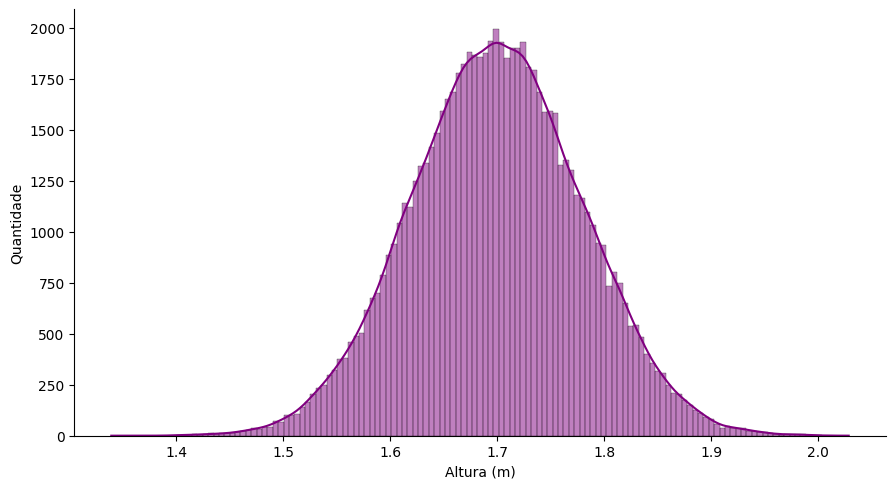

In [35]:
ax = sns.displot(data=df['Altura'], color='purple', kde=True)
ax.figure.set_size_inches(10,5)
ax.set_ylabels('Quantidade')
ax.set_xlabels('Altura (m)')

In [38]:
dist_freq_renda.sort_index(axis='index', ascending=True, inplace=True)
dist_freq_renda

,Frequência,Porcentagem %
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


<AxesSubplot:>

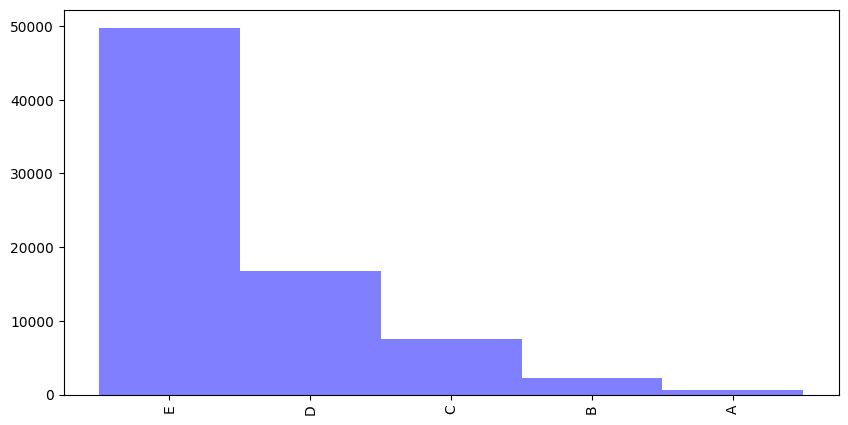

In [49]:
dist_freq_renda['Frequência'].plot.bar(figsize=(10,5), width=1, color='blue', alpha=0.5)

# 3 Medidas de Tendência Central

## 3.1 Média

In [52]:
boletim = pd.DataFrame({'Fulano': [8, 10, 4, 8, 6, 10, 8], 'Siclano': [4, 8, 7, 5, 7, 10, 9], 'Beltrano': [10, 8, 7, 6, 5, 9,8]},
                       index=['Matemática', 'Física', 'Química', 'Biologia', 'Artes', 'História', 'Inglês']
                       )
boletim['Fulano'].mean()

7.714285714285714

In [53]:
df['Renda'].mean()

2000.3831988547631

In [58]:
# Média por grupo de Sexo
grupo_sexo = df.groupby(by=['Sexo'])
grupo_sexo['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

## 3.2 Mediana

In [61]:
df['Renda'].median()

1200.0

In [68]:
notas_fulano = boletim['Fulano']
notas_fulano = notas_fulano.sort_values()
notas_fulano.sort_values(inplace=True, ascending=True)

In [90]:
notas_fulano = notas_fulano.reset_index()

In [91]:
elemento_mediano = int((notas_fulano.shape[0] + 1)/2)
notas_fulano.loc[elemento_mediano]


index     Inglês
Fulano         8
Name: 4, dtype: object

In [92]:
notas_fulano

,index,Fulano
0,Química,4
1,Artes,6
2,Matemática,8
3,Biologia,8
4,Inglês,8
5,Física,10
6,História,10


In [103]:
notas_beltrano = boletim['Beltrano']
notas_beltrano = notas_beltrano.sort_values()
notas_beltrano = notas_beltrano.reset_index()
notas_beltrano = notas_beltrano.iloc[1: , :]

In [106]:
n = notas_beltrano.shape[0]

In [107]:
mediana = (notas_beltrano['Beltrano'][n/2] + notas_beltrano['Beltrano'][(n/2)+1])/2
mediana

8.0

In [108]:
notas_beltrano['Beltrano'].median()

8.0

In [110]:
boletim.mode()

,Fulano,Siclano,Beltrano
0,8,7,8


In [112]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64

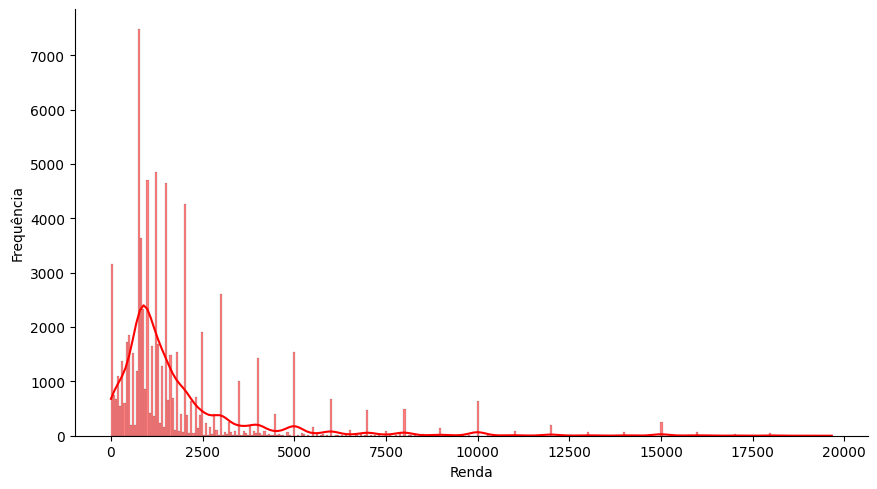

In [125]:
ax = sns.displot(df.query('Renda < 20000')['Renda'], color='red', alpha=0.5, kde=True)
ax.figure.set_size_inches(10,5)
ax.set_ylabels('Frequência')
#Assimetrica à direita


In [130]:
media = df.query('Renda < 20000')['Renda'].mean()
moda = df.query('Renda < 20000')['Renda'].mode()
mediana = df.query('Renda < 20000')['Renda'].median()

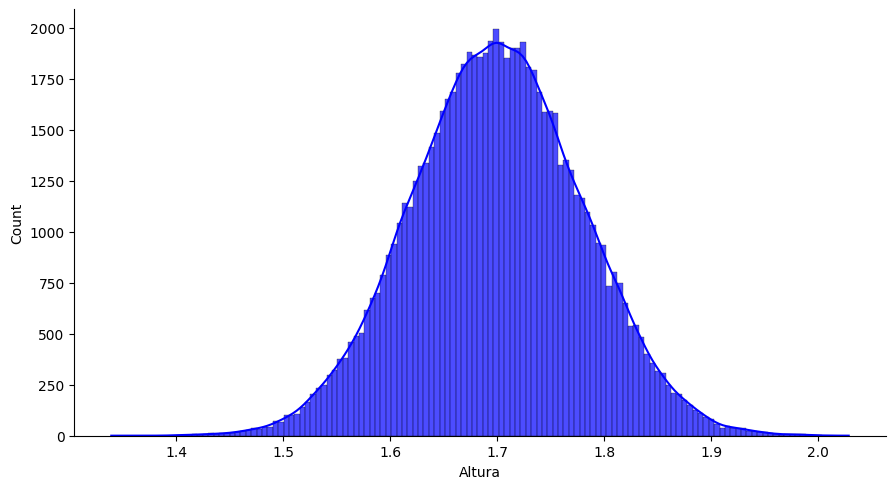

In [137]:
fig = sns.displot(df['Altura'], color='blue', kde=True, alpha=0.7)
fig.figure.set_size_inches(10,5)
#Simétrica


In [138]:
moda = df['Altura'].mode()
mediana = df['Altura'].median()
media = df['Altura'].median()

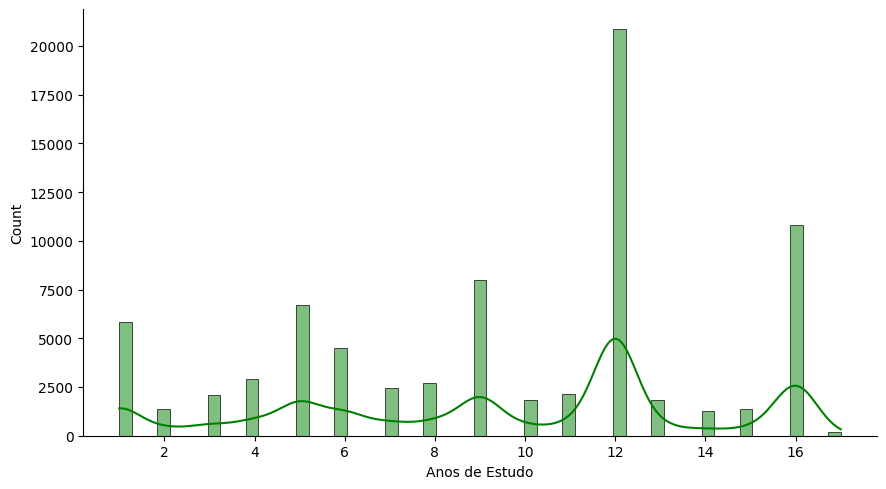

In [151]:
fig_ano_de_estudo = sns.displot(df['Anos de Estudo'], kde=True, color='green', alpha=0.5)
fig_ano_de_estudo.figure.set_size_inches(10,5)
#Assimétrica à esquerda

In [145]:
moda = df['Anos de Estudo'].mode()
mediana = df['Anos de Estudo'].median()
media = df['Anos de Estudo'].mean()